In [1]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")
library(velocyto.R)
library(stringr)
library(SeuratWrappers)
library(DAseq)
load("6_18.RData")

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [2]:
HSC=subset(x = merged_obj, idents  = c("2","3","7","9"))
head(HSC)

orig.ident nCount_RNA nFeature_RNA nCount_ADT
mWT_AAACCCAAGTGATCGG-1 mWT         3787      1690         103       
mWT_AAACCCACAAACCATC-1 mWT        13420      3991         284       
mWT_AAACCCACAGCCATTA-1 mWT        11463      3649         180       
mWT_AAACCCATCTGTCCCA-1 mWT         4328      1881          58       
mWT_AAACGAATCGAAGGAC-1 mWT         3817      1681         129       
mWT_AAACGAATCGGCTTCT-1 mWT         2896      1274         107       
mWT_AAACGCTCAAGTGACG-1 mWT         4721      1961         114       
mWT_AAAGAACAGGAAAGGT-1 mWT         3803      1640         161       
mWT_AAAGGATTCACCACAA-1 mWT         5210      2082          46       
mWT_AAAGGTACAAGAGCTG-1 mWT         5832      2150         136       
                       nFeature_ADT percent.mt RNA.weight  ADT.weight
mWT_AAACCCAAGTGATCGG-1 7            5.307631   0.129729865 0.8702701 
mWT_AAACCCACAAACCATC-1 8            3.204173   0.040801805 0.9591982 
mWT_AAACCCACAGCCATTA-1 8            2.852656   0.118308303 0.8816917 
mWT_AAACCCATCTGTCCCA-1 7            4.875231   0.131311467 0.8686885 
mWT_AAACGAATCGAAGGAC-1 8            5.789887   0.218265923 0.7817341 
mWT_AAACGAATCGGCTTCT-1 7            5.352210   0.140741945 0.8592581 
mWT_AAACGCTCAAGTGACG-1 8            5.994493   0.042580206 0.9574198 
mWT_AAAGAACAGGAAAGGT-1 8            6.021562   0.002434168 0.9975658 
mWT_AAAGGATTCACCACAA-1 8            5.239923   0.081846468 0.9181535 
mWT_AAAGGTACAAGAGCTG-1 7            5.006859   0.163492916 0.8365071 
                       wsnn_res.1 seurat_clusters Blood_pred
mWT_AAACCCAAGTGATCGG-1 9          9               9         
mWT_AAACCCACAAACCATC-1 3          3               3         
mWT_AAACCCACAGCCATTA-1 9          9               9         
mWT_AAACCCATCTGTCCCA-1 2          2               2         
mWT_AAACGAATCGAAGGAC-1 2          2               2         
mWT_AAACGAATCGGCTTCT-1 9          9               9         
mWT_AAACGCTCAAGTGACG-1 2          2               2         
mWT_AAAGAACAGGAAAGGT-1 2          2               2         
mWT_AAAGGATTCACCACAA-1 2          2               2         
mWT_AAAGGTACAAGAGCTG-1 9          9               9         
                       BM_pred                 Bone_pred              
mWT_AAACCCAAGTGATCGG-1 9                       9                      
mWT_AAACCCACAAACCATC-1 Hematopoietic Stem Cell 3                      
mWT_AAACCCACAGCCATTA-1 9                       9                      
mWT_AAACCCATCTGTCCCA-1 Hematopoietic Stem Cell Hematopoietic Stem Cell
mWT_AAACGAATCGAAGGAC-1 Hematopoietic Stem Cell Hematopoietic Stem Cell
mWT_AAACGAATCGGCTTCT-1 9                       9                      
mWT_AAACGCTCAAGTGACG-1 Hematopoietic Stem Cell Hematopoietic Stem Cell
mWT_AAAGAACAGGAAAGGT-1 Hematopoietic Stem Cell Hematopoietic Stem Cell
mWT_AAAGGATTCACCACAA-1 Hematopoietic Stem Cell Hematopoietic Stem Cell
mWT_AAAGGTACAAGAGCTG-1 9                       9                      
                       id       
mWT_AAACCCAAGTGATCGG-1 reference
mWT_AAACCCACAAACCATC-1 reference
mWT_AAACCCACAGCCATTA-1 reference
mWT_AAACCCATCTGTCCCA-1 reference
mWT_AAACGAATCGAAGGAC-1 reference
mWT_AAACGAATCGGCTTCT-1 reference
mWT_AAACGCTCAAGTGACG-1 reference
mWT_AAAGAACAGGAAAGGT-1 reference
mWT_AAAGGATTCACCACAA-1 reference
mWT_AAAGGTACAAGAGCTG-1 reference

In [10]:
library(corrplot)
library(RColorBrewer)


Calculating cluster 2

Calculating cluster 3

Calculating cluster 7

Calculating cluster 9



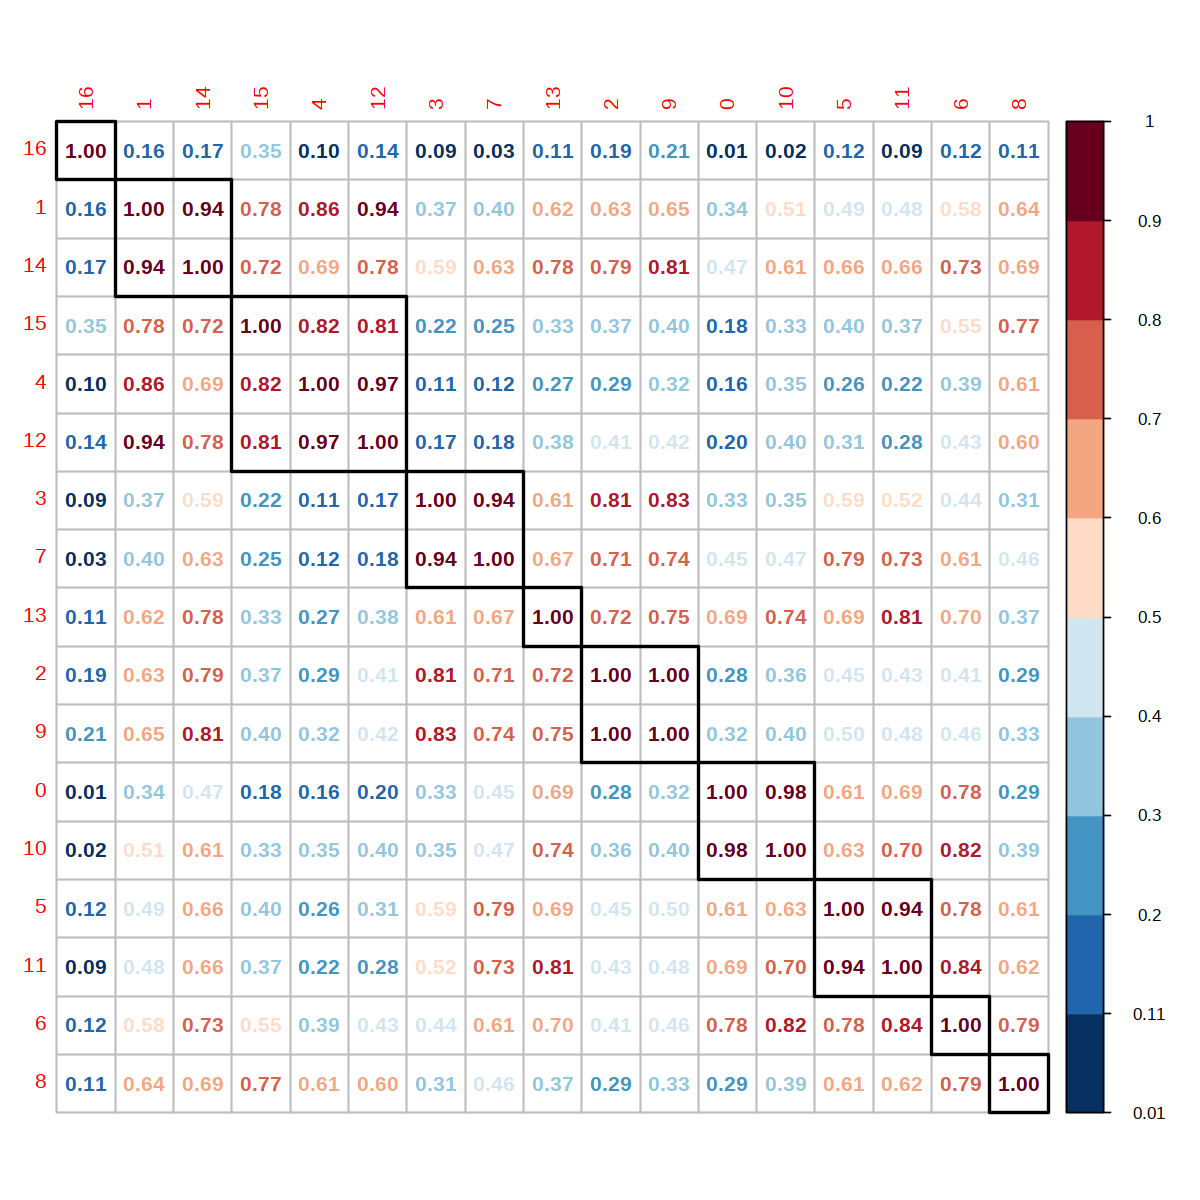

In [18]:
options(repr.plot.width = 10, repr.plot.height = 10)
markers <- FindAllMarkers(HSC, min.pct = 0.2, logfc.threshold = 0.2,test.use="wilcox")
top20 = markers %>%
    group_by(cluster) %>%
    top_n(n = 20, wt = avg_log2FC)
top50 = markers %>%
    group_by(cluster) %>%
    top_n(n = 50, wt = avg_log2FC)
av.exp <- AverageExpression(merged_obj)$RNA
cor.exp <- cor(av.exp[top20$gene,])
corrplot(cor.exp, method = 'number',is.corr = FALSE,col = rev(brewer.pal(n = 10, name = 'RdBu')),order = 'hclust', addrect = 10)

In [22]:
library(clusterProfiler)
library(org.Mm.eg.db)

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, ta

In [24]:
head(top20)

p_val         avg_log2FC pct.1 pct.2 p_val_adj    cluster gene  
1 8.151739e-102 1.1314281  0.356 0.100 2.531359e-97 2       Wfdc17
2 1.592893e-101 0.7881931  0.935 0.898 4.946411e-97 2       H2afy 
3  3.769291e-95 0.7654281  0.651 0.380 1.170478e-90 2       Cd34  
4  9.976010e-84 0.6416433  0.326 0.097 3.097850e-79 2       Flt3  
5  2.184882e-80 0.6177680  0.858 0.722 6.784714e-76 2       Ramp1 
6  2.963550e-73 0.7514580  0.571 0.340 9.202713e-69 2       Emb

'select()' returned 1:1 mapping between keys and columns



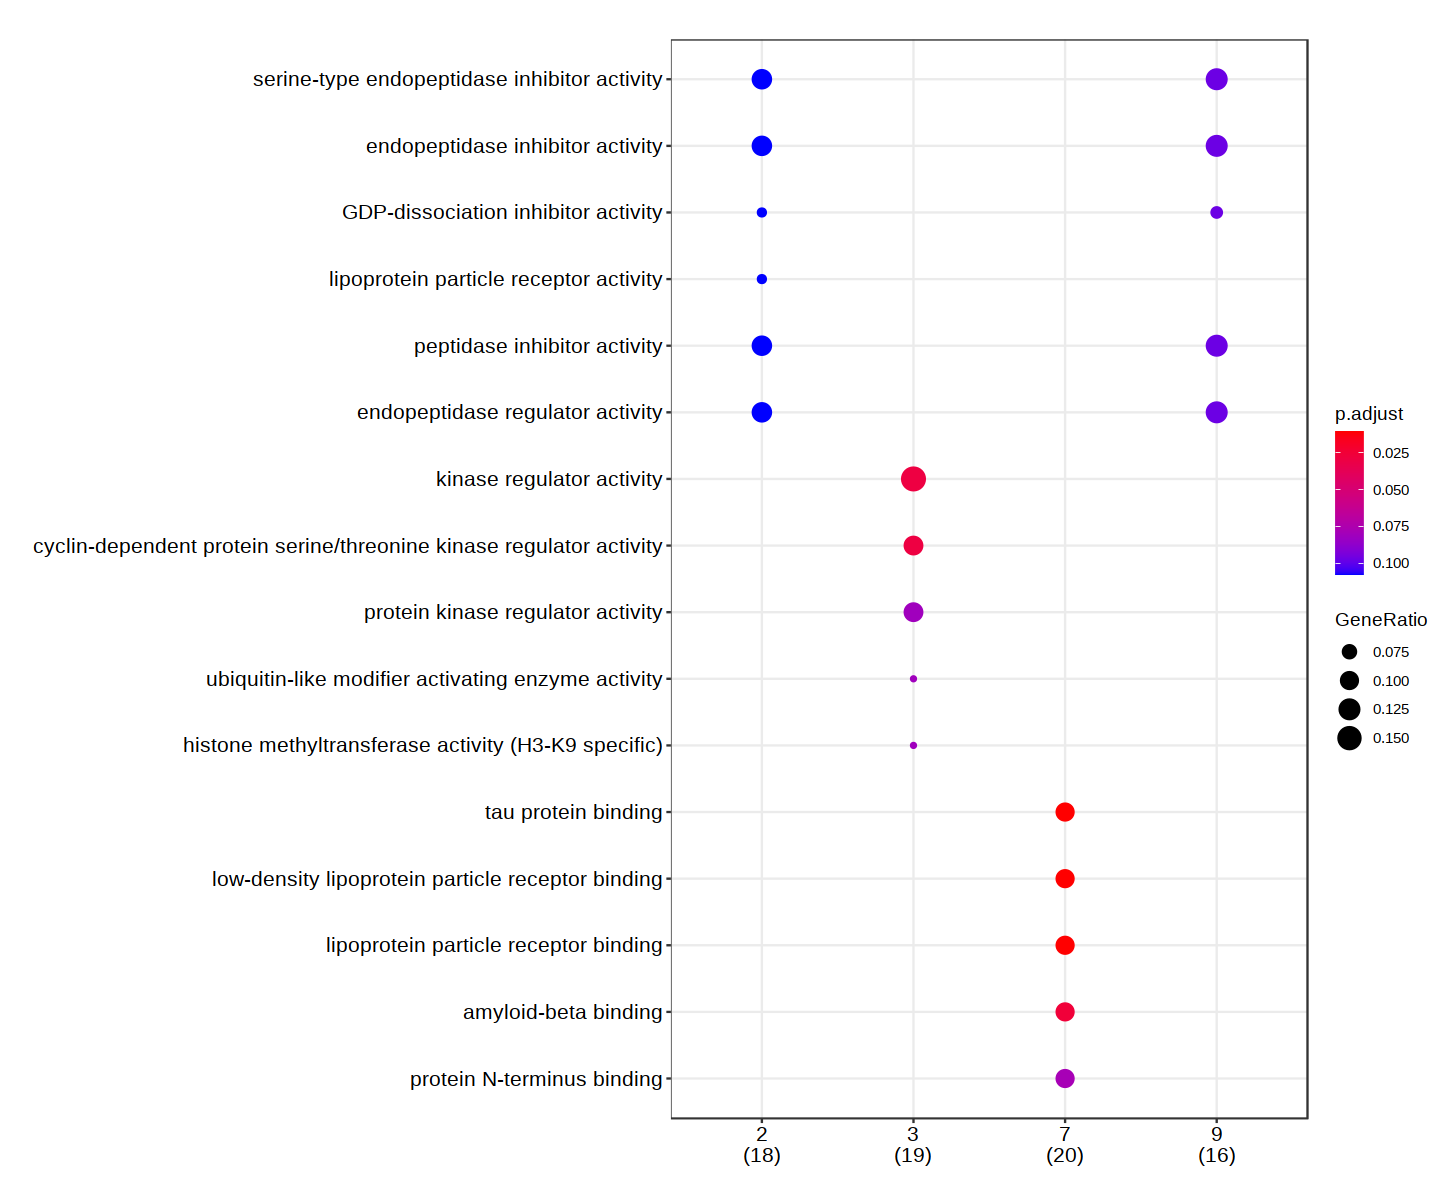

In [27]:
top20$ENTREZID = mapIds(org.Mm.eg.db, top20$gene, 'ENTREZID', 'SYMBOL')
formula_res_MF <- compareCluster(ENTREZID~cluster, data=top20, fun="enrichGO",OrgDb = org.Mm.eg.db,ont="MF",qvalueCutoff=0.5,pvalueCutoff=0.2)
options(repr.plot.width = 12, repr.plot.height = 10)
dotplot(formula_res_MF)


'select()' returned 1:1 mapping between keys and columns



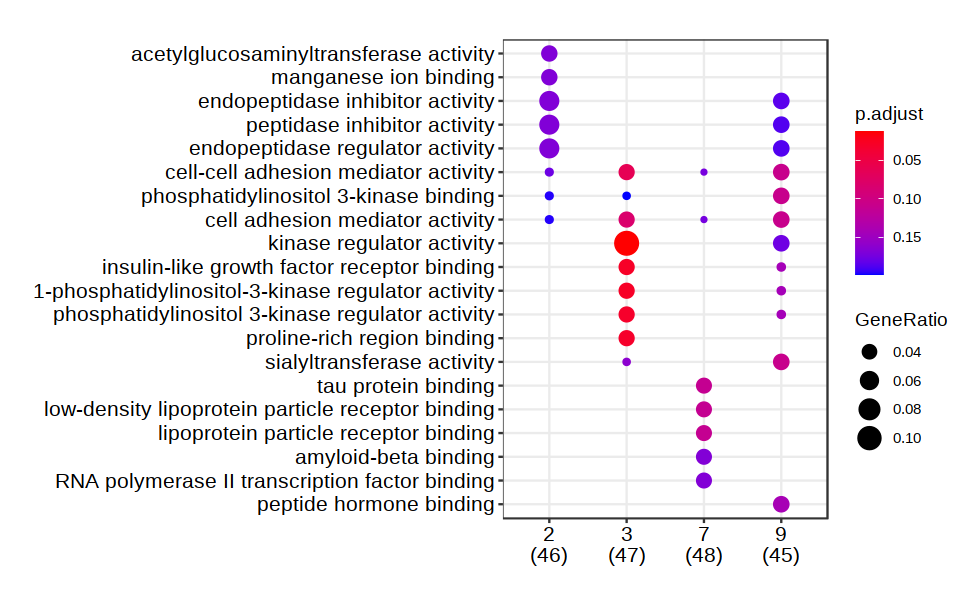

In [35]:
top50$ENTREZID = mapIds(org.Mm.eg.db, top50$gene, 'ENTREZID', 'SYMBOL')
formula_res_MF <- compareCluster(ENTREZID~cluster, data=top50, fun="enrichGO",OrgDb = org.Mm.eg.db,ont="MF",qvalueCutoff=0.5,pvalueCutoff=0.2)
options(repr.plot.width = 8, repr.plot.height = 5)
dotplot(formula_res_MF)


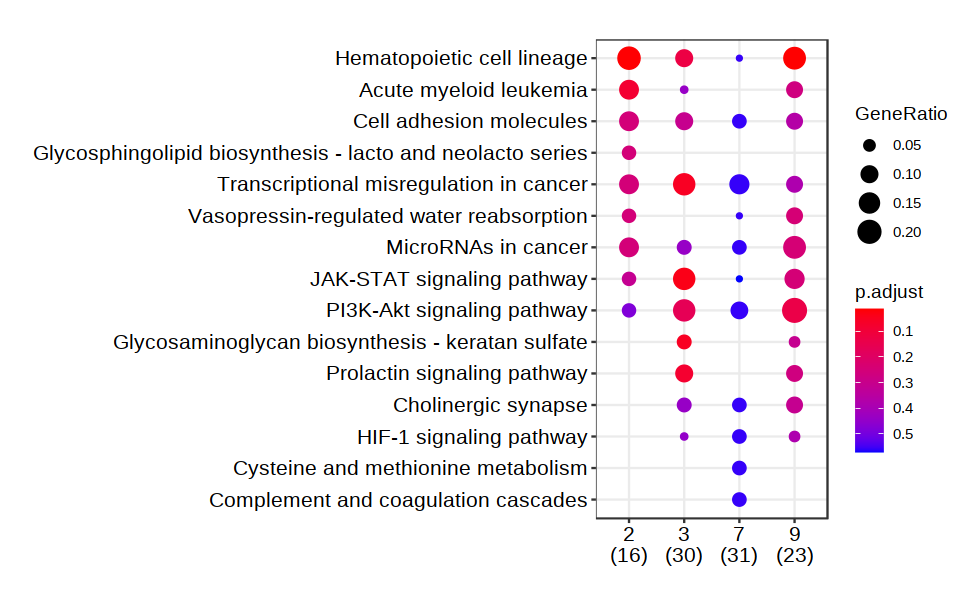

In [38]:
formula_res_KEGG <- compareCluster(ENTREZID~cluster, data=top50, fun="enrichKEGG",organism="mmu",qvalueCutoff=0.8,pvalueCutoff=0.8)
options(repr.plot.width = 8, repr.plot.height = 5)
dotplot(formula_res_KEGG)

'select()' returned 1:1 mapping between keys and columns



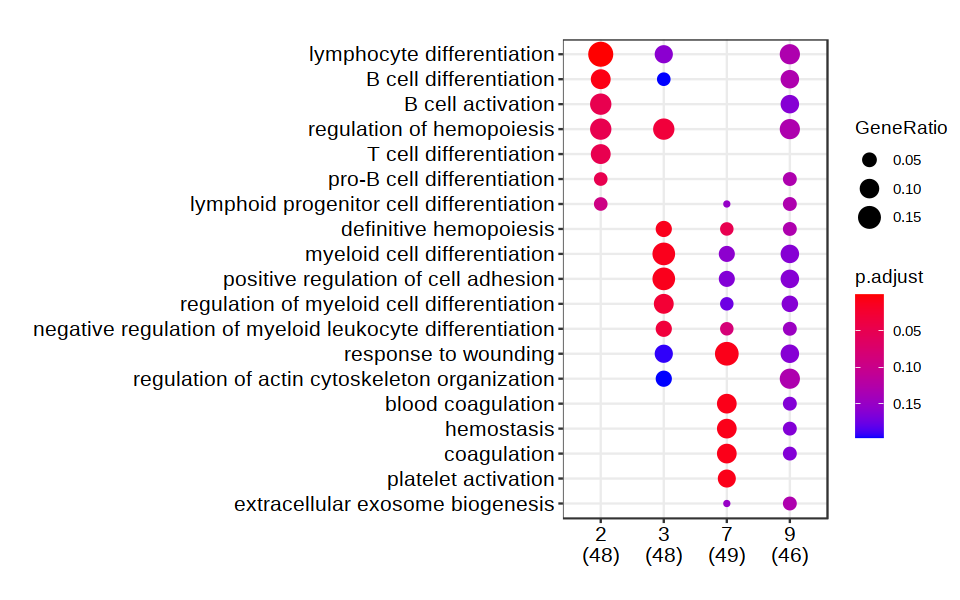

In [37]:
top50$ENTREZID = mapIds(org.Mm.eg.db, top50$gene, 'ENTREZID', 'SYMBOL')
formula_res_MF <- compareCluster(ENTREZID~cluster, data=top50, fun="enrichGO",OrgDb = org.Mm.eg.db,ont="BP",qvalueCutoff=0.5,pvalueCutoff=0.2)
options(repr.plot.width = 8, repr.plot.height = 5)
dotplot(formula_res_MF)


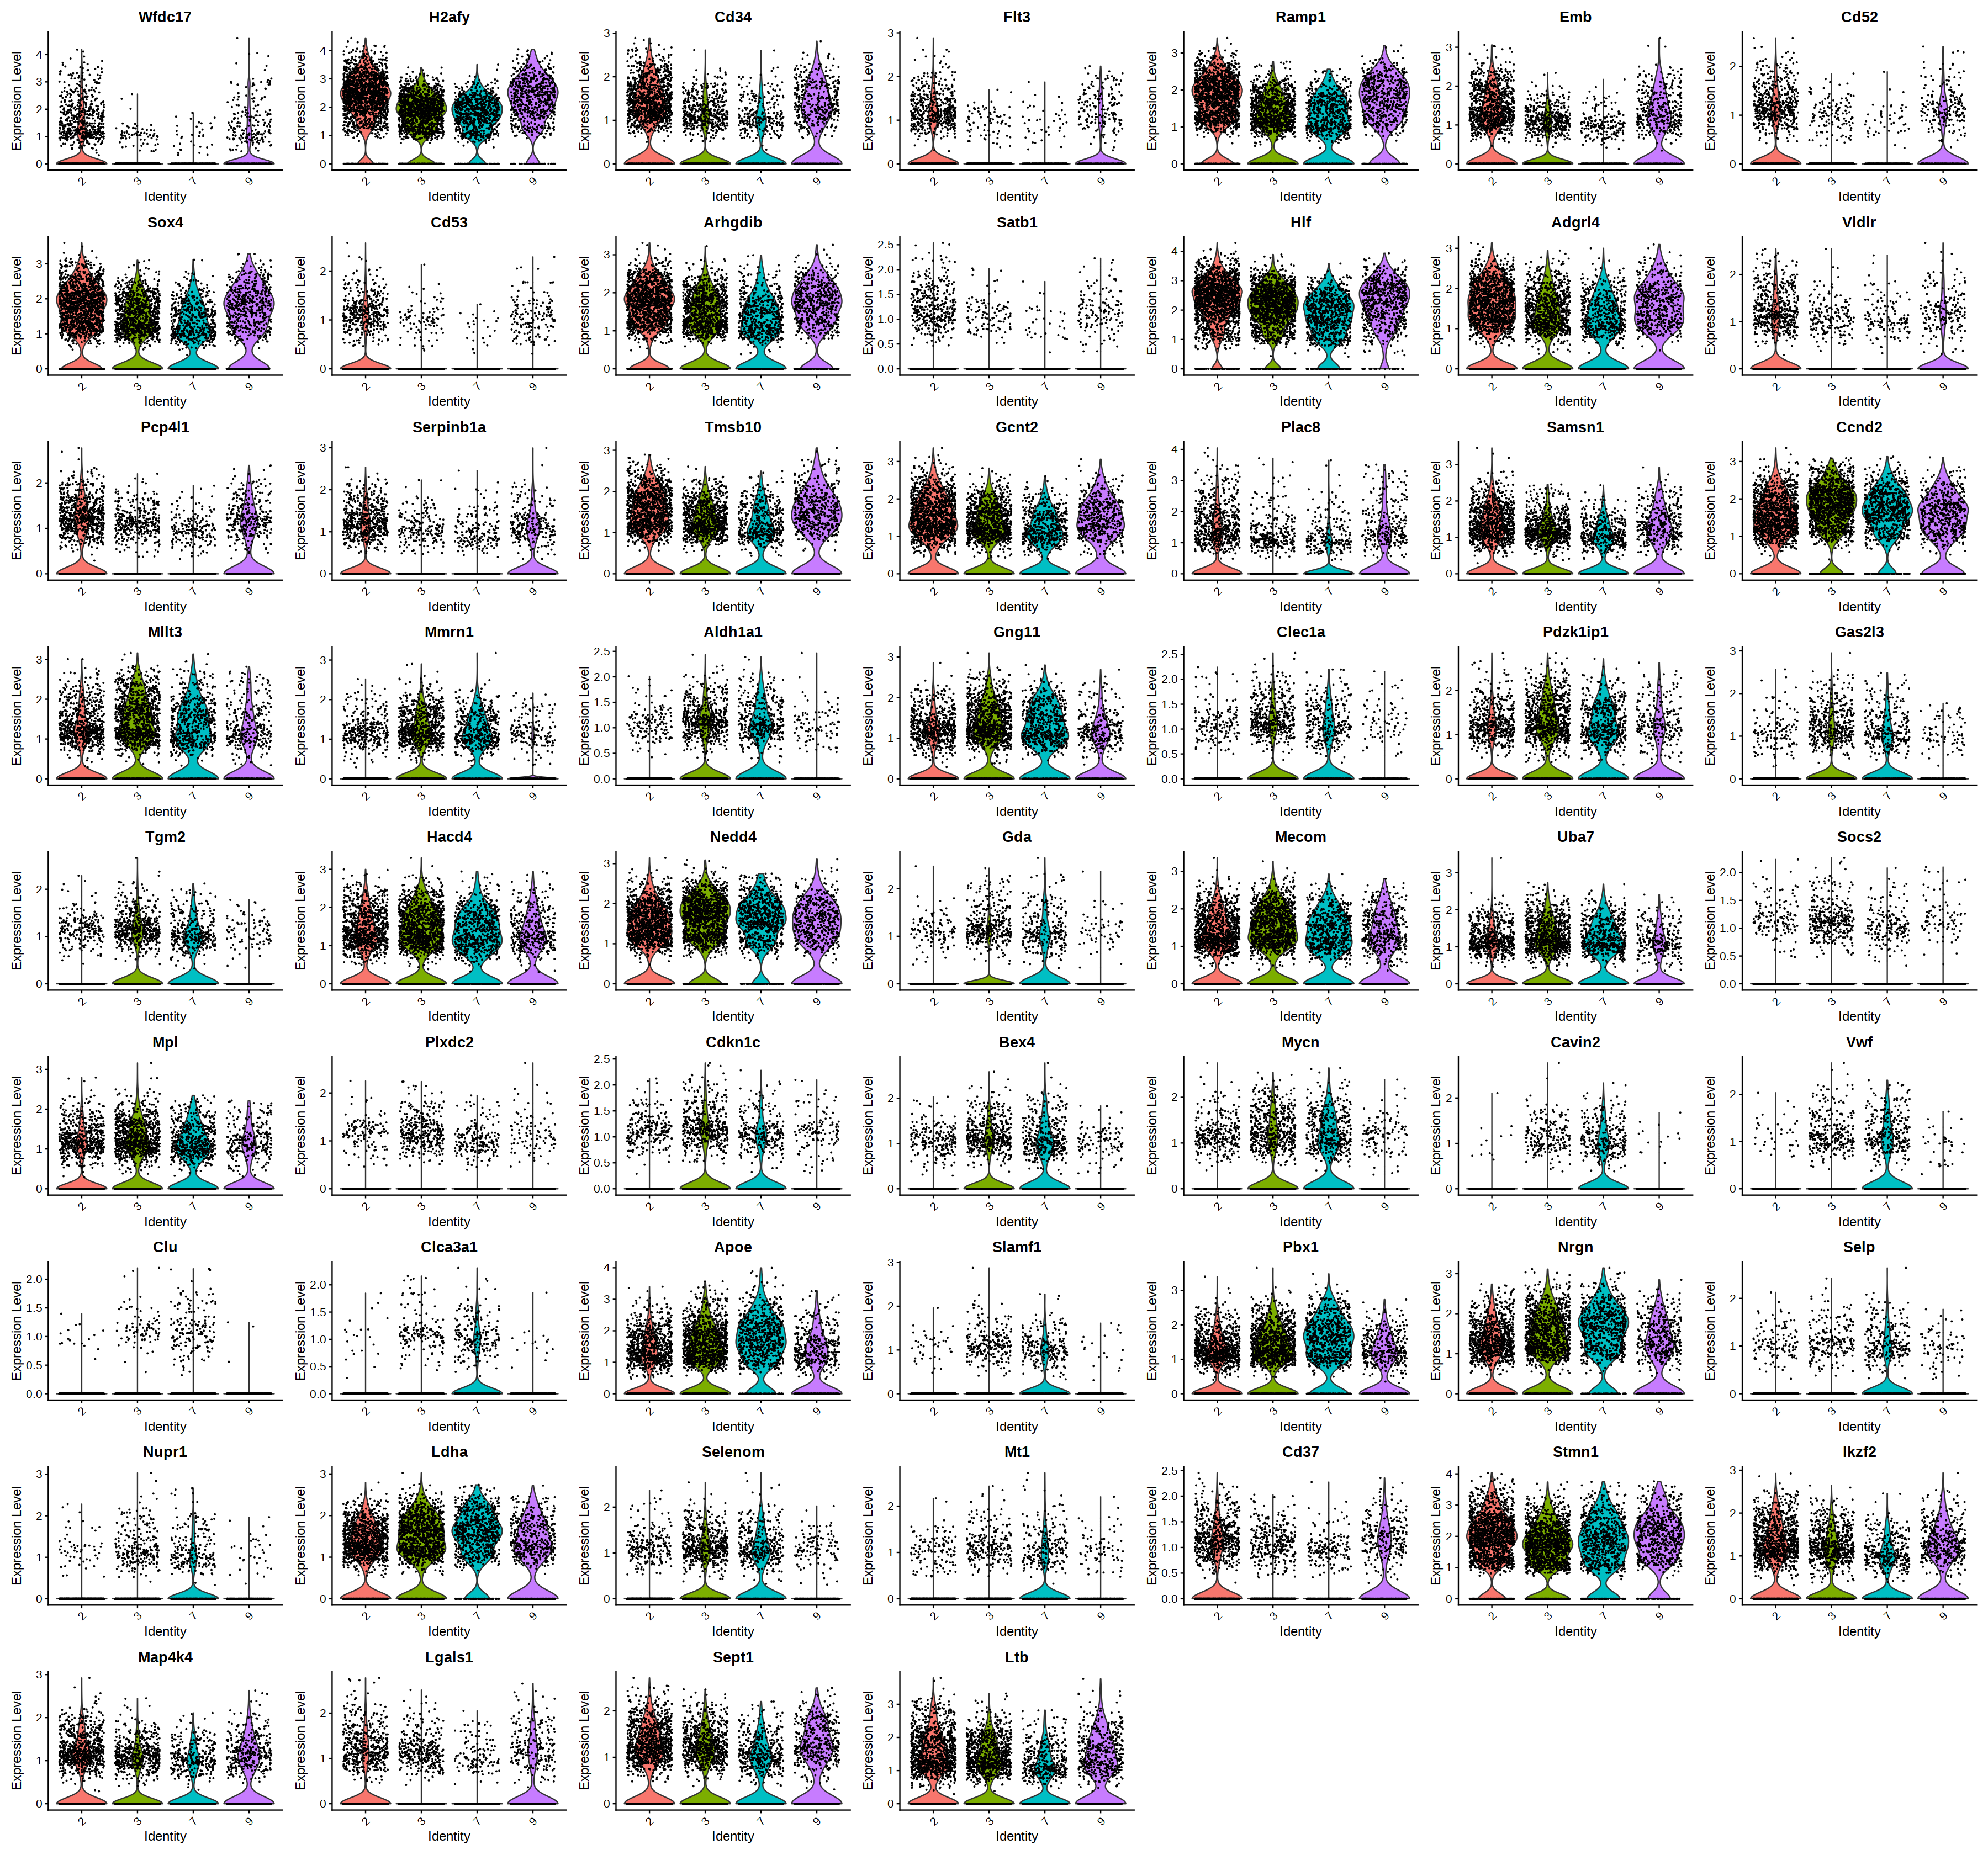

In [44]:
options(repr.plot.width = 30, repr.plot.height = 28)
VlnPlot(HSC, features = unique(top20$gene),group.by="seurat_clusters",ncol=7)+ NoLegend()

Warning message in DoHeatmap(HSC, features = top20$gene, size = 5):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: Sept1, Map4k4, Cd37, Ldha, Uba7, Nedd4, Ccnd2, Samsn1, Tmsb10”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



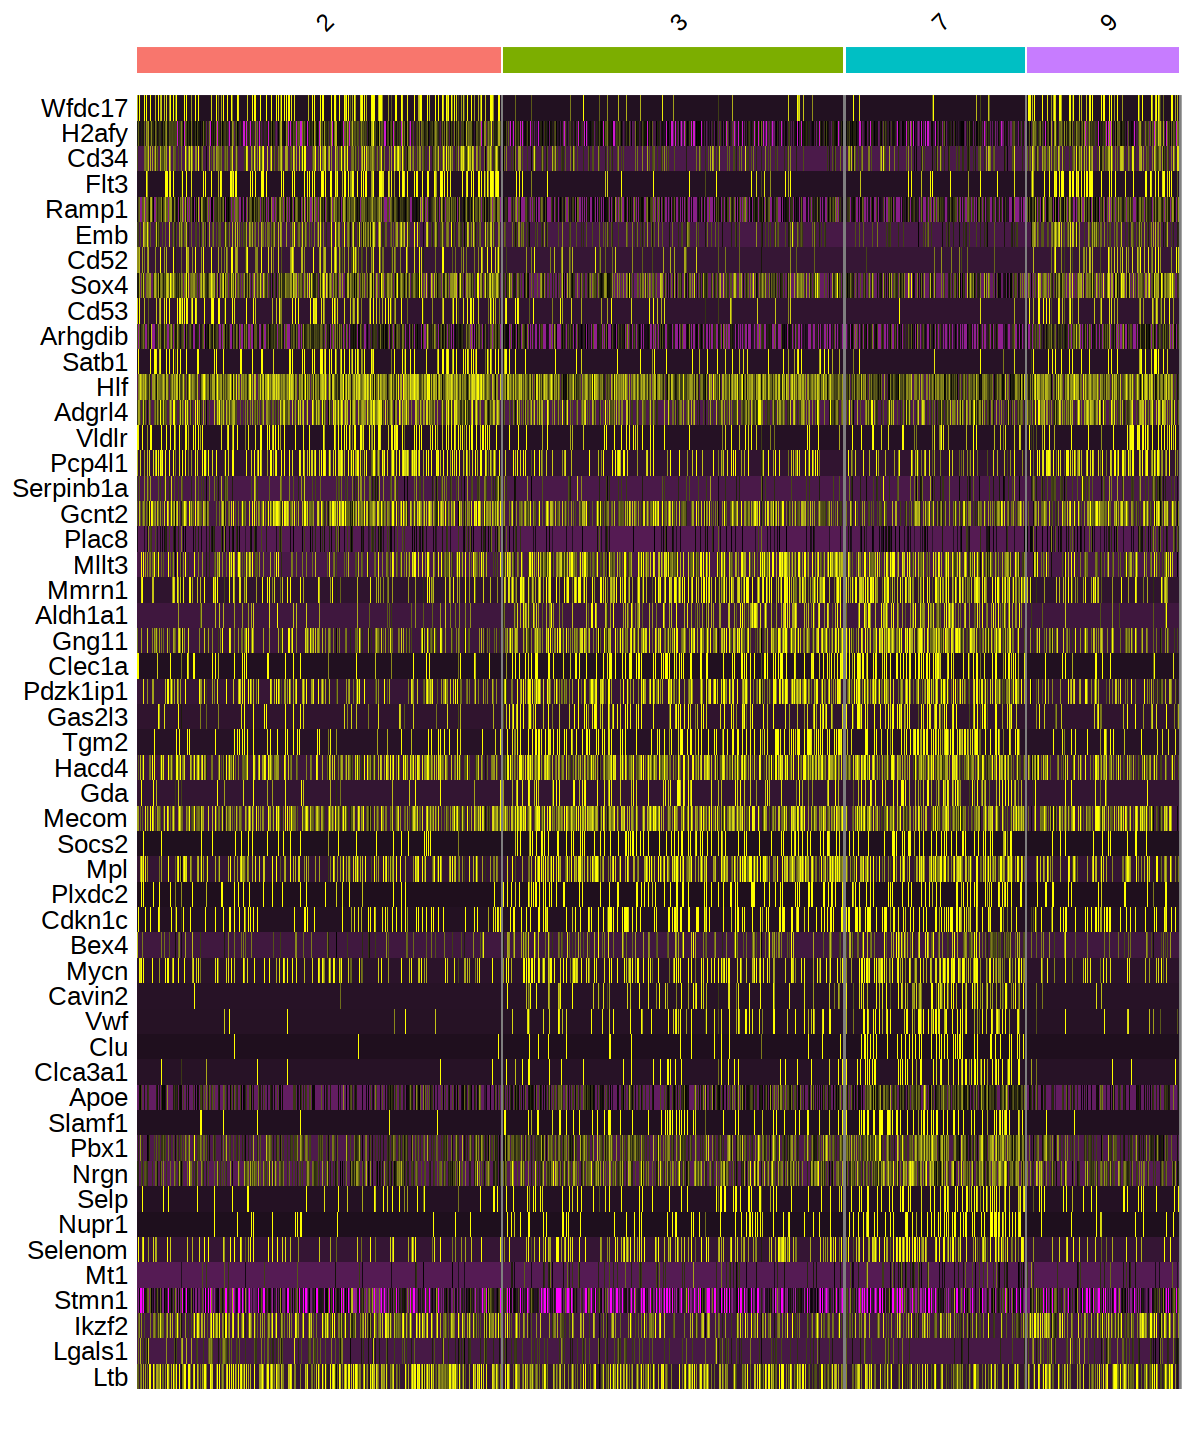

In [45]:
options(repr.plot.width = 10, repr.plot.height = 12)

DoHeatmap(HSC, features = top20$gene, size  = 5)+theme(axis.text.y = element_text(face="plain", color="black", 
                           size=15, angle=0))+scale_fill_gradient2(low = "magenta", high = "yellow", mid = "black", midpoint = 0, limits = c(-2.5, 2.5))+NoLegend()

corrplot 0.90 loaded

